<div class="alert alert-info">
    
# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных  
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
    balcony — число балконов  
    ceiling_height — высота потолков (м)  
    cityCenters_nearest — расстояние до центра города (м)  
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
    first_day_exposition — дата публикации  
    floor — этаж  
    floors_total — всего этажей в доме  
    is_apartment — апартаменты (булев тип)  
    kitchen_area — площадь кухни в квадратных метрах (м²)  
    last_price — цена на момент снятия с публикации  
    living_area — жилая площадь в квадратных метрах (м²)  
    locality_name — название населённого пункта  
    open_plan — свободная планировка (булев тип)  
    parks_around3000 — число парков в радиусе 3 км  
    parks_nearest — расстояние до ближайшего парка (м)  
    ponds_around3000 — число водоёмов в радиусе 3 км  
    ponds_nearest — расстояние до ближайшего водоёма (м)  
    rooms — число комнат  
    studio — квартира-студия (булев тип)  
    total_area — площадь квартиры в квадратных метрах (м²)  
    total_images — число фотографий квартиры в объявлении  

<div class="alert alert-info">
    
## Изучение данных из файла

In [60]:
import pandas as pd
import math
#import calendar
#import numpy as np

In [61]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [62]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

<div class="alert alert-info">
    
### Вывод

🧑‍🎓 Ира: 22 столбца в датафрейме, строк всего 23699, в данных присутствуют пропуски, некоторые столбцы названы не совсем корректно(на мой взгляд)    

<div class="alert alert-info">

## Предобработка данных

In [63]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [64]:
df.rename(columns={"cityCenters_nearest": "city_centers_nearest", "parks_around3000": "parks_around_3000",
                  "ponds_around3000": "ponds_around_3000"}, inplace=True)

In [65]:
all_variables = df.shape[0]

def empty_unique_values(list_column):
    for column in list_column:
        column_nan = df[column].isna().sum()
        column_proportion = column_nan / all_variables * 100
        print('Доля пропущенных значений в столбце', column, '=', column_proportion)
        print()
        #print('Кол-во уникальных значений в столбце', column, '=', df[column].unique())
        #print()

In [66]:
list_column = ['ceiling_height', 'floors_total', 'living_area', 'is_apartment',
               'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest',
               'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']

empty_unique_values(list_column)



Доля пропущенных значений в столбце ceiling_height = 38.799105447487236

Доля пропущенных значений в столбце floors_total = 0.36288450989493226

Доля пропущенных значений в столбце living_area = 8.029874678256467

Доля пропущенных значений в столбце is_apartment = 88.2906451749019

Доля пропущенных значений в столбце kitchen_area = 9.612219924891345

Доля пропущенных значений в столбце balcony = 48.605426389299126

Доля пропущенных значений в столбце locality_name = 0.20675977889362418

Доля пропущенных значений в столбце airports_nearest = 23.384952951601335

Доля пропущенных значений в столбце city_centers_nearest = 23.28790244314106

Доля пропущенных значений в столбце parks_around_3000 = 23.2836828558167

Доля пропущенных значений в столбце parks_nearest = 65.90995400649817

Доля пропущенных значений в столбце ponds_around_3000 = 23.2836828558167

Доля пропущенных значений в столбце ponds_nearest = 61.55955947508333

Доля пропущенных значений в столбце days_exposition = 13.42250727

In [67]:
print('Кол-во уникальных значений в столбце balcony =', df['balcony'].unique())
print('Кол-во уникальных значений в столбце is_apartment =', df['is_apartment'].unique())

Кол-во уникальных значений в столбце balcony = [nan  2.  0.  1.  5.  4.  3.]
Кол-во уникальных значений в столбце is_apartment = [nan False True]



🧑‍🎓 Ира: заполнить пустые значения возможно только в столбцах balcony и is_apartment   
    Если кол-во балконов не заполнено, скорее всего оно = 0, так как могли не заполнить кол-во балконов при их отсутствии  
    Если признак аппартаментов не заполнен, скорее всего значение = False, так как если это не апартаменты, могли не указать  

Все остальные пропуски выглядят просто как незнание клиента, так как обычно вся инфо по квартире мало кому интересна, особенно если квартира старая/досталась в наследство, поэтому человек может не знать/не помнить такие метрики, как расстояние до центра/аэропорта или высота потолков, близость парков/прудов.  

Пустота в метриках по типу жилая площадь в кв метрах или площадь кухни выглядит странно, так как во многих сервисах это обязательные поля для заполнения, но если такого условия нет, человек мог не заполнить эти данные опять же по незнанию, или же это была программная ошибка.   



In [68]:
df = df.dropna(subset=['locality_name'], how='all')
df['balcony'] = df['balcony'].fillna(0.0)
df['is_apartment'] = df['is_apartment'].fillna('False')

def df_median(list_median):
    for row in list_median:
        df[row] = df[row].fillna(df[row].median())
        
list_median = ['ceiling_height', 'floors_total','living_area','kitchen_area',
               'airports_nearest','city_centers_nearest',
               'parks_around_3000','parks_nearest','ponds_around_3000','ponds_nearest','days_exposition']

df_median(list_median)


In [69]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

In [70]:
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['parks_around_3000'] = df['parks_around_3000'].astype(int)
df['ponds_around_3000'] = df['ponds_around_3000'].astype(int)


<div class="alert alert-info">

### Предобработка данных - вывод

Были проанализированы пропуски в данных, исправлены кривые нейминги столбцов датасета, исправлены типы данных для некоторых метрик.

Пропуски в некоторых метриках, таких как жилая площадь в кв метрах или площадь кухни выглядит, следует отдельно проанализировать,
возможноследует сказать команде разработки об этом. 

Пропуски в метриках заполнены среднем значением по всему датасету, пропуски в столбцах "кол-во балконов" и "признак апартаментов" заполнены 
логически правильными значениями(на мой взгляд)





<div class="alert alert-info">

## Расчёты и добавление результатов в таблицу

В таблицу необходимо добавить следующую информацию:  
* цену квадратного метра;  
* день недели, месяц и год публикации объявления;  
* этаж квартиры; варианты — первый, последний, другой;  
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [71]:
df['area_price'] = df['last_price'] / df['total_area']
df['date_datetime'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['exposition_day'] = pd.DatetimeIndex(df['date_datetime']).day
df['exposition_month'] = pd.DatetimeIndex(df['date_datetime']).month 
df['exposition_year'] = pd.DatetimeIndex(df['date_datetime']).year
df['living_area_ratio'] = df['living_area'] / df['total_area'] #соотношение жилой площади и общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] #соотношение площади кухни к общей

def floor_categorys(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else: return 'другой'

df['floor_category'] = df.apply(floor_categorys, axis=1)

df.head() #выведем первые 5 строк таблицы для проверки, что все необходимые столбцы добавлены

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8        False  ...   
1            2.65            11         18.6      1        False  ...   
2            2.65             5         34.3      4        False  ...   
3            2.65            14         30.0      9        False  ...   
4            3.03            14         32.0     13        False  ...   

   ponds_nearest  days_exposition     area_price  date_datetime  \
0          755.0             95.0  120370.370370     2019-03-07   
1          502.0             81.0   82920.792079     2018-12-04   
2          574.0            558.0   92785.714286     2015-08-20   
3          234.0            424.0  408176.100629     2015-07-24   
4           48.0            121.0  100000.000000     2018-06-19   

  exposition_day  exposition_month  exposition_year  living_area_ratio  \
0              7                 3             2019           0.472222   
1              4                12             2018           0.460396   
2             20                 8             2015           0.612500   
3             24                 7             2015           0.188679   
4             19                 6             2018           0.320000   

   kitchen_area_ratio  floor_category  
0            0.231481          другой  
1            0.272277          первый  
2            0.148214          другой  
3            0.057233          другой  
4            0.410000          другой  

[5 rows x 30 columns]

<div class="alert alert-info">

## Исследовательский анализ данных

<div class="alert alert-info">

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

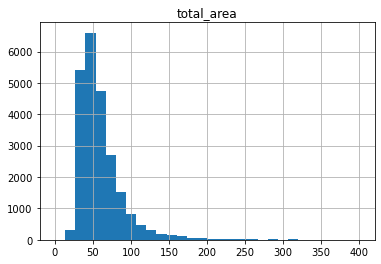

In [72]:
df.hist('total_area', range=(0,400), bins=30)

🧑‍🎓 Ира: На данной гистограмме видно, что большинство квартир имеет общую площадь в диапазоне 30-70 кв.м,
но есть и исключения, где общая площадь превышает 200 кв.м, скорее всего это ошибка ввода данных

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

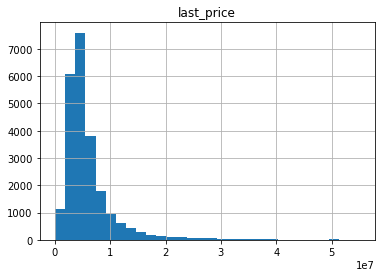

In [73]:
df.hist('last_price', bins=30, range=(0,55000000))

🧑‍🎓 Ира: гистограмма цены очень схожа с гистрограммой общей площади. Это логично, ведь цена сильно зависит от площади квартиры(чем больше площадь - тем выше цена)

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

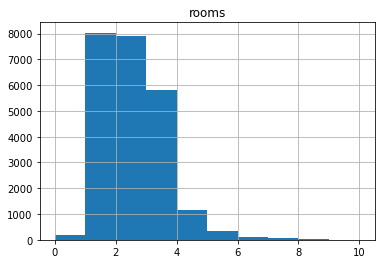

In [74]:
df.hist('rooms', range=(0,10))

🧑‍🎓 Ира: большинство квартир имеют 2-3 комнаты

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

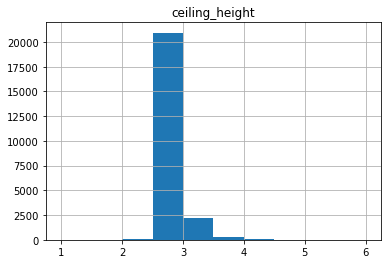

In [75]:
df.hist('ceiling_height', range=(1,6))

🧑‍🎓 Ира: на гистограмме четко видно, что подавляющее большинство квартир имеет высоту потолков до 3м

<div class="alert alert-info">

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

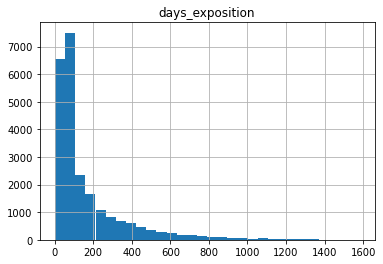

In [76]:
df.hist('days_exposition', bins=30)

In [77]:
days_exposition_mean = df['days_exposition'].mean()
days_exposition_median = df['days_exposition'].median()

print('days_exposition_mean = ', days_exposition_mean,
        'days_exposition_median = ', days_exposition_median)




days_exposition_mean =  169.22274841437633 days_exposition_median =  95.0


🧑‍🎓 Ира: на гистограмме видно, что есть большой пик в начале, где кол-во дней не превышает 100.  
Так же можно сказать, что в среднем продажа квартиры занимает от 100 до 200 дней  
 
Если отвечать вопрос, когда продажи прошли очень быстро, а когда очень долго, я бы сказала, что пик до 100 дней- это сверхбыстрые продажи, а все что дольше 800-сверхдолгие  
В одном из [источников](https://www.domofond.ru/statya/vo_skolko_oboydetsya_srochnaya_prodazha_nedvizhimosti/100605)  нашла:
> Так, средний срок продажи однокомнатных квартир составляет 1–2 месяца, двухкомнатных — 2–4 месяца, трехкомнатных — до 6 месяцев.  

 
Это соответствует моим выводам

<div class="alert alert-info">

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [78]:
df = df.query('100 <= days_exposition <= 800')
df = df.query('total_area <= 200')
df = df.query('last_price <= 30000000')

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

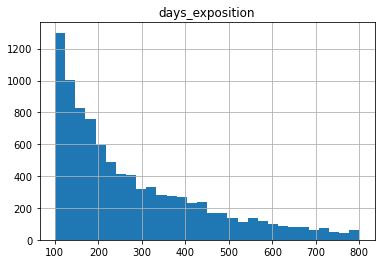

In [79]:
df.hist('days_exposition', bins=30)

<div class="alert alert-info">
    
### Какие факторы больше всего влияют на стоимость квартиры?

 Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [80]:
df_corr = df[['last_price', 'total_area', 'rooms', 'city_centers_nearest', 'parks_nearest', 'airports_nearest',
             'ponds_nearest', 'floor_category', 'exposition_day', 'exposition_month', 'exposition_year']]


df_corr.corr()['last_price'] #выведем только столбец last_price, так как остальные корреляции нам не нужны


last_price              1.000000
total_area              0.792425
rooms                   0.506980
city_centers_nearest   -0.306143
parks_nearest           0.055042
airports_nearest       -0.025821
ponds_nearest          -0.068585
exposition_day          0.000696
exposition_month        0.003986
exposition_year        -0.013598
Name: last_price, dtype: float64

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

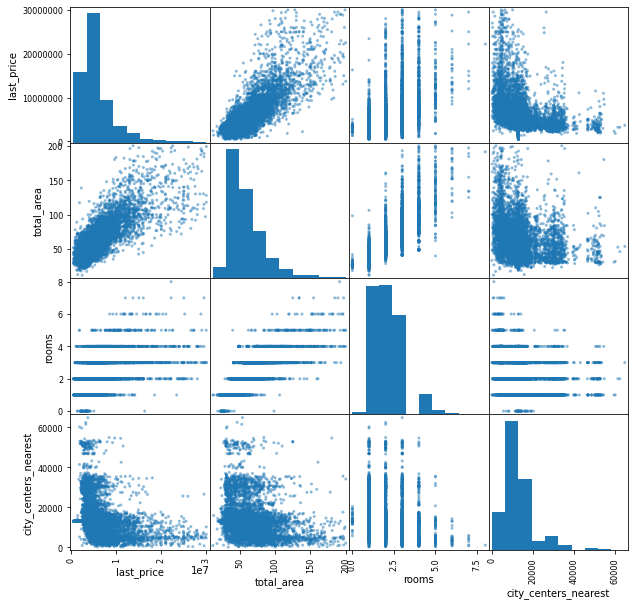

In [81]:
pd.plotting.scatter_matrix(df_corr[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(10, 10)) 

🧑‍🎓 Ира:   
 На финальную цену сильно влияет площадь квартиры(и это логично): чем выше площадь, тем выше стоимость квартиры 
 
 Меньше, но все же кол-во комнат тоже влияет на стоимость, чем больше комнат, тем выше стоимость(но если квартира свободной планировки, кол-во комнат скорее всего будет нежавно, так как можно сделать из планируемой трешки двушку или наоборот)  
 
 Еще слабее, но расстояние до центра города влияет на стоимость в обратную сторону, чем дальше расстояние до центра, тем стоимость ниже. 
 Хотя на диаграмме рассеяния видно, что большинство "дорогих квартир" лежит на расстоянии до 2км от центра города.  
 
 Расстояние до парков/прудов/аэропорта почти никак не влияют на стоимость(корреляция даже меньше |0,1|), так же как и то, когда было выставлено объявление о продаже.
 
 Мое мнение - странно, что расстояние до парков/прудов почти никак не влияет на стоимость.  
 В наше время, особенно в больших городах, это очень важно, в любом объявлении или презентации новостройки будет описано, какая вокруд продаваемого жилья парковая инфраструктура(при условии, что она имеется). Возможно в данном датасете нет такого влияния потому, что подборка не только по Питеру, но и по пригородам, а там скорее всего парки/пруды или вообще какая-то зелень есть почти везде


<div class="alert alert-info">
    
### Выберите 10 населённых пунктов с наибольшим числом объявлений.

 Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [82]:
df_majority = df.pivot_table(index='locality_name' ,values='last_price',
                             aggfunc='count').sort_values(by='last_price', ascending=False).head(10)

good_data = df.query('locality_name in @df_majority.index')
good_data_stat = good_data.pivot_table(index='locality_name' ,values='area_price', aggfunc='mean')
display(good_data_stat)
min_price = good_data_stat['area_price'].min()
max_price = good_data_stat['area_price'].max()
display(min_price, max_price)



area_price
locality_name                   
Всеволожск          66764.064041
Выборг              56028.529823
Гатчина             66238.414366
Колпино             74760.227074
Пушкин             103308.036791
Санкт-Петербург    109063.649359
деревня Кудрово     91861.511582
посёлок Мурино      83934.195754
посёлок Парголово   89301.326153
посёлок Шушары      76424.594860

56028.52982322673

109063.64935919765

<div class="alert alert-info">

### Изучите предложения квартир

для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

<AxesSubplot:xlabel='centers_nearest_km'>

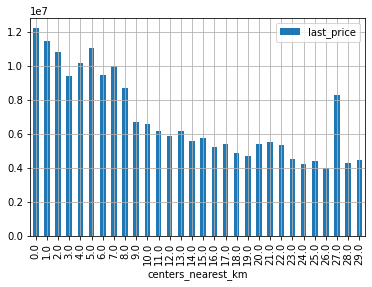

In [83]:
saint_p_df = df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
saint_p_df['centers_nearest_km'] = (saint_p_df['city_centers_nearest'] / 1000).round()
saint_p_mean = saint_p_df.pivot_table(index=['centers_nearest_km'], values='last_price', 
                                      aggfunc='mean').reset_index()

saint_p_mean.plot(x='centers_nearest_km', y='last_price', kind='bar', grid=True)


🧑‍🎓 Ира: Дороже всего средняя цена за км находится на расстоянии меньше 7км

<div class="alert alert-info">

### Выделите сегмент квартир в центре.

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [84]:
saint_p_center = saint_p_df[saint_p_df['centers_nearest_km'] 
                            <= 8][['total_area', 'last_price', 'rooms', 'ceiling_height',
                                  'floor', 'centers_nearest_km', 
                                   'exposition_day', 'exposition_month', 'exposition_year']].reset_index(drop=True)


print(saint_p_center.corr()['last_price'])



total_area            0.732790
last_price            1.000000
rooms                 0.438040
ceiling_height        0.082848
floor                 0.162443
centers_nearest_km   -0.100218
exposition_day        0.008268
exposition_month      0.000994
exposition_year       0.018638
Name: last_price, dtype: float64


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='centers_nearest_km', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='centers_nearest_km', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='centers_nearest_km', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='centers_nearest_km'>,
        <AxesSubplot:xlabel='total_area', ylabel='centers_nearest_km'>,
        <AxesSubplot:xlabel='rooms', ylabel='centers_nearest_km'>,
        <AxesSubplot:xlabel='

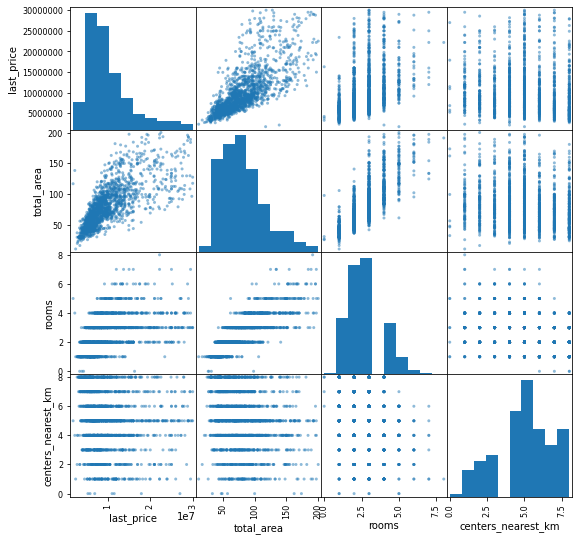

In [85]:
pd.plotting.scatter_matrix(saint_p_center[['last_price', 'total_area',
                                           'rooms', 'centers_nearest_km']], figsize=(9, 9)) 

🧑‍🎓 Ира: выводы по срезу данных от общих выводов не особо отличаются, но в отличии от общих выводов, в этом сегменте квартир влияние расстояния от центра практически отсутствует(что наверное логично)

<div class="alert alert-info">

## Общий вывод

Была проанализирована таблица с информацией об объявлениях по продаже недвижимости в Санкт-Петербурге и области.  

Были замечены пропуски в данных, которые были заменены при возможности. По моему мнению, об отсутствующих данных необходимо сказать команде разработки, чтобы команда нашла ошибку в загрузке данных и исправили формирование данных.  

Так же были изучены зависимости цены квартиры от метрик. Основным влияющим фактором при ценообразиовании является площадь квартиры.  

Так же можно сказать, что в среднем продажа квартиры занимает от 100 до 200 дней.  

Самая низкая стоимсоть кв.м в Выборге  

Самая высокая в Санкт-Петербурге
